In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/edwardlrichards/evansecentMF/drumTest") 

import numpy as np
import pandas as pd
from loadTest_mat import ReducedLocationForcing

In [2]:
dataDir = '/Users/edwardlrichards/Documents/data/drum_chirp/'
fs = 1e6
#load measurment data
readingRange = np.arange(3) + 200
drumExperiment = ReducedLocationForcing(dataDir, fs)
readings = drumExperiment.loadExperiments(readingRange)
timeSeries = readings[0].getTimeSeries()

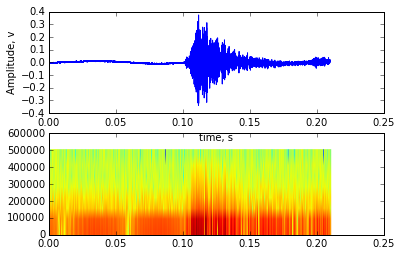

In [3]:
ax1 = plt.subplot(211)
_ = plt.plot(timeSeries.index, timeSeries)
_ = plt.xlabel('time, s')
_ = plt.ylabel('Amplitude, v')

_ = plt.subplot(212, sharex=ax1)
NFFT = 2^12
Pxx, freqs, bins, im = plt.specgram(timeSeries, NFFT=NFFT, Fs=fs,\
                                noverlap=NFFT/2)

In [4]:
InputTimeSeries = readings[0].getTimeSeries(outSignal = False)

In [5]:
ax1 = plt.subplot(211)
_ = plt.plot(InputTimeSeries.index, InputTimeSeries)
_ = plt.xlabel('time, s')
_ = plt.ylabel('Amplitude, v')

_ = plt.subplot(212, sharex=ax1)
NFFT = 2^12
Pxx, freqs, bins, im = plt.specgram(InputTimeSeries, NFFT=NFFT, Fs=fs,\
                                noverlap=NFFT/2)

In [6]:
matchedFilter = readings[0].matchedFilter()

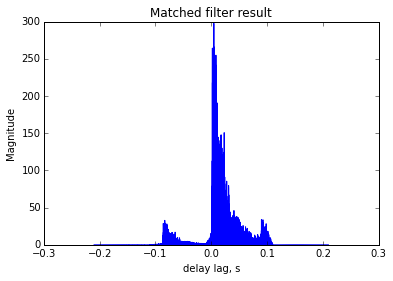

In [7]:
# plot the matched filter result
_ = plt.plot(matchedFilter.index, np.abs(matchedFilter))
_ = plt.xlabel('delay lag, s')
_ = plt.ylabel('Magnitude')
_ = plt.title('Matched filter result')

In [8]:
matchedFilter.asof(1e-4)

8.5736228466034046